# O algoritmo de regressão linear
Começamos nossa exploração de técnicas de aprendizado de máquina com o algoritmo de regressão linear. Nosso objetivo é construir um modelo para prever os valores de uma variável dependente a partir dos valores de uma ou mais variáveis ​​independentes.

A relação entre essas duas variáveis ​​é linear; isto é, se y é a variável dependente e x o independente, então o relacionamento linear entre as duas variáveis ​​será parecido com isto: y = Ax + b.

O algoritmo de regressão linear se adapta a uma grande variedade de situações; por sua versatilidade, é amplamente utilizado no campo das ciências aplicadas, por exemplo, biologia e economia.

Além disso, a implementação deste algoritmo nos permite introduzir de uma maneira totalmente clara e compreensível os dois conceitos importantes de aprendizado de máquina: a função de custo e os algoritmos de gradiente descendente.

## Modelo de dados
O primeiro passo crucial é construir nosso modelo de dados. Mencionamos anteriormente que a relação entre nossas variáveis ​​é linear, ou seja: y = Ax + b, onde A e b são constantes. Para testar nosso algoritmo, precisamos de pontos de dados em um espaço bidimensional.

Começamos importando a biblioteca Python NumPy:

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
number_of_points = 500
x_point = []
y_point = []

a = 0.22
b = 0.78

In [3]:
for i in range(number_of_points):
    x = np.random.normal(0.0,0.5)
    y = a*x + b +np.random.normal(0.0,0.1)
    x_point.append([x])
    y_point.append([y])

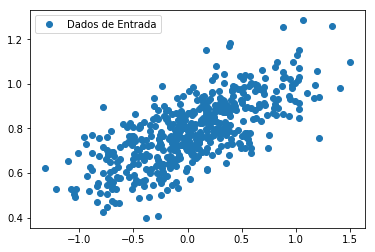

In [7]:
plt.plot(x_point,y_point, 'o', label='Dados de Entrada')
plt.legend()
plt.show()

## Funções de custo e gradiente descendente
O algoritmo de aprendizado de máquina que queremos implementar com o TensorFlow deve prever valores de y como uma função de x dados de acordo com nosso modelo de dados. O algoritmo de regressão linear determinará os valores das constantes A e b (fixadas para nosso modelo de dados), que são, então, as verdadeiras incógnitas do problema.

A primeira etapa é importar a biblioteca tensorflow:

In [8]:
import tensorflow as tf

Em seguida, defina as variáveis A e b, usando o TensorFlow tf.Variable:

In [9]:
A = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

Então escrevemos o relacionamento linear que liga y para x:

In [10]:
y = A * x_point + b

Agora vamos introduzir, esta função de custo: que tem parâmetros contendo um par de valores A e b a serem determinados que retornam um valor que estima o quão bem os parâmetros estão corretos. Neste exemplo, nossa função de custo é erro quadrático médio:

In [11]:
cost_function = tf.reduce_mean(tf.square(y - y_point))

Aqui, 0,5 é a taxa de aprendizado do algoritmo.

A taxa de aprendizagem determina o quão rápido ou lento nos movemos para os pesos ideais. Se for muito grande, ignoramos a solução ideal e, se ela é muito pequena, precisamos de muitas iterações para convergir para os melhores valores.

Um valor intermediário (0,5) é fornecido, mas deve ser ajustado para melhorar o desempenho de todo o procedimento.

In [12]:
optimizer = tf.train.GradientDescentOptimizer(0.5)

Definimos trem como resultado da aplicação da função cost_factor (otimizador), através de sua função minimizar:

In [14]:
train = optimizer.minimize(cost_function)

## Testando o modelo

Agora podemos testar o algoritmo de gradiente descendente no modelo de dados que você criou anteriormente. Como de costume, temos que inicializar todas as variáveis:

In [16]:
model = tf.global_variables_initializer()

Assim, construímos nossa iteração (20 etapas de cálculo), o que nos permite determinar os melhores valores de A e b, que definem a linha que melhor se ajusta ao modelo de dados. Instancie o gráfico de avaliação:

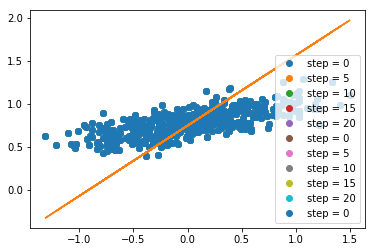

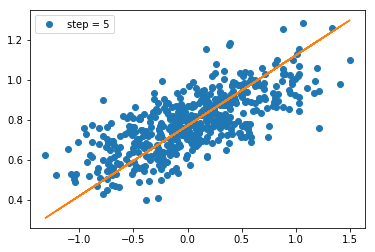

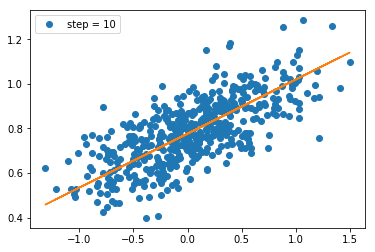

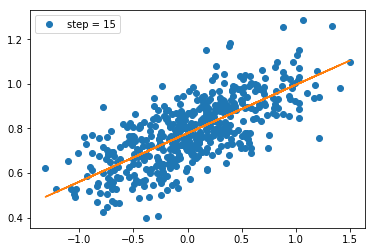

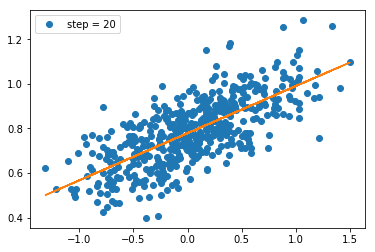

In [19]:
with tf.Session() as session:
        session.run(model)
        for step in range(0,21):
                session.run(train)
                if (step % 5) == 0:
                        plt.plot(x_point,y_point,'o', label='step = {}'.format(step))
                        plt.plot(x_point, session.run(A) * x_point + session.run(b))
                        plt.legend()
                        plt.show()